In [1]:
%pylab inline
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = sc.read('./data_h5/Insular_sorted_clusters.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 122663 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sex', 'Sample', 'cellTypeID', 'cellTypeLabel', 'cell_subtypeID', 'cell_subtypeLabels', 'cellTypeID_2', 'cellType_labels_2', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Sex_colors', 'batch_colors', 'cellTypeID_2_colors', 'cellTypeID_colors', 'cellTypeLabel_colors', 'cellType_labels_2_colors', 'cell_subtypeID_colors', 'cell_subtypeLabels_colors', 'dendrogram_cellTypeLabel', 'dendrogram_cellType_labels_2', 'dendrogram_cell_subtypeLabels', 'hvg', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', '

In [4]:
adata.obs['cellType_labels_2'].cat.categories

Index(['Inh VIP SCNG', 'Inh SST PENK', 'Inh SST MME', 'Inh LAMP5 RGCC',
       'Inh SST ANXA2', 'Inh VIP SHISA8', 'Inh VIP SMOC1', 'Inh VIP RASL10A',
       'Inh SST PTK2B', 'Inh LAMP5 IL13RA1', 'Inh PVALB PVALB',
       'Inh LAMP5 BCAM', 'Inh VIP CRISPLD1', 'Inh SNCG IGFBP2',
       'Inh PVALB COL5A2', 'Inh LAMP5 GSTM2', 'Inh LAMP5 BMP2',
       'Inh SNCG ARHGAP18', 'Inh SNCG PIK3CG', 'Inh SNCG PDLIM5',
       'Inh SST SP5', 'Inh SNCG S100A6', 'Inh SNCG ADRA1D', 'Inh SNCG CDH24',
       'Inh SST SLC30A3', 'Inh SNCG KLHL13', 'Inh SERPINF1 DCN',
       'Inh SNCG TPM2', 'Inh SNCG C1QL2', 'Inh LAMP5 SERPINF1',
       'Inh PVALB NKX2-1', 'Inh SST CHODL', 'Inh VIP SLIT1', 'Exc RORB SCN7A',
       'Exc HPCAL1 MEPE', 'Exc RORB CDK2AP1', 'Exc FEZF2 RSPO3',
       'Exc FEZF2 SMYD1', 'Exc HPCAL1 FREM3', 'Exc FEZF2 LTBP3',
       'Exc RORB CYP26B1', 'Exc FEZF2 COL24A1', 'Exc RORB DEPTOR',
       'Exc FEZF2 HTR2C', 'Exc RORB CHI3L1', 'Exc HPCAL1 FRZB', 'Exc RORB FAP',
       'Exc RORB NRG1', 'Exc 

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


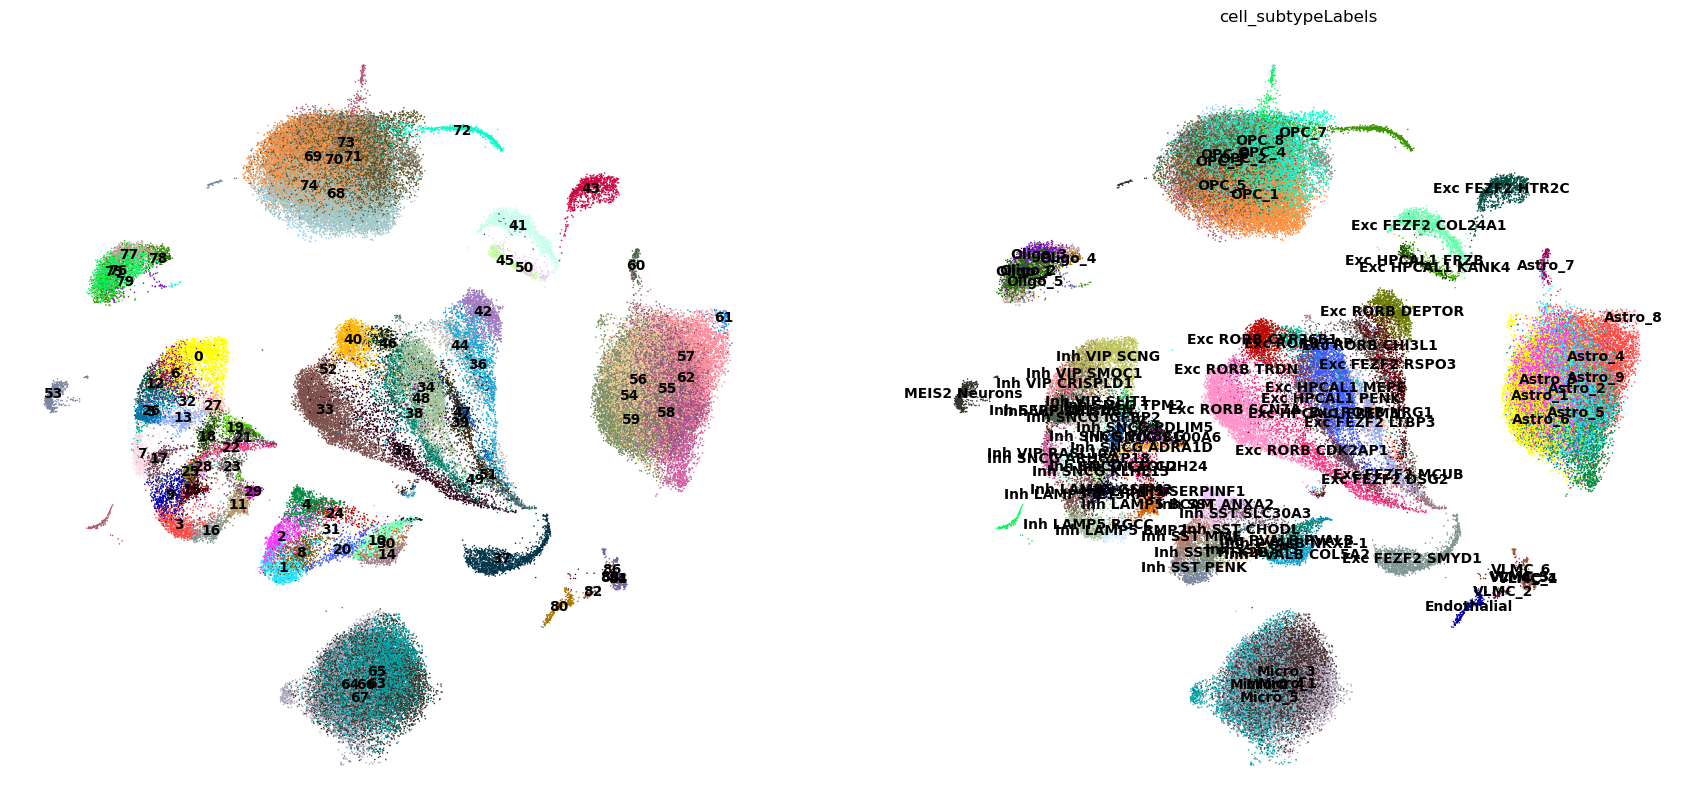

In [5]:
figsize(10,10)
sc.pl.umap(adata, color=['cell_subtypeID','cell_subtypeLabels'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5)

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


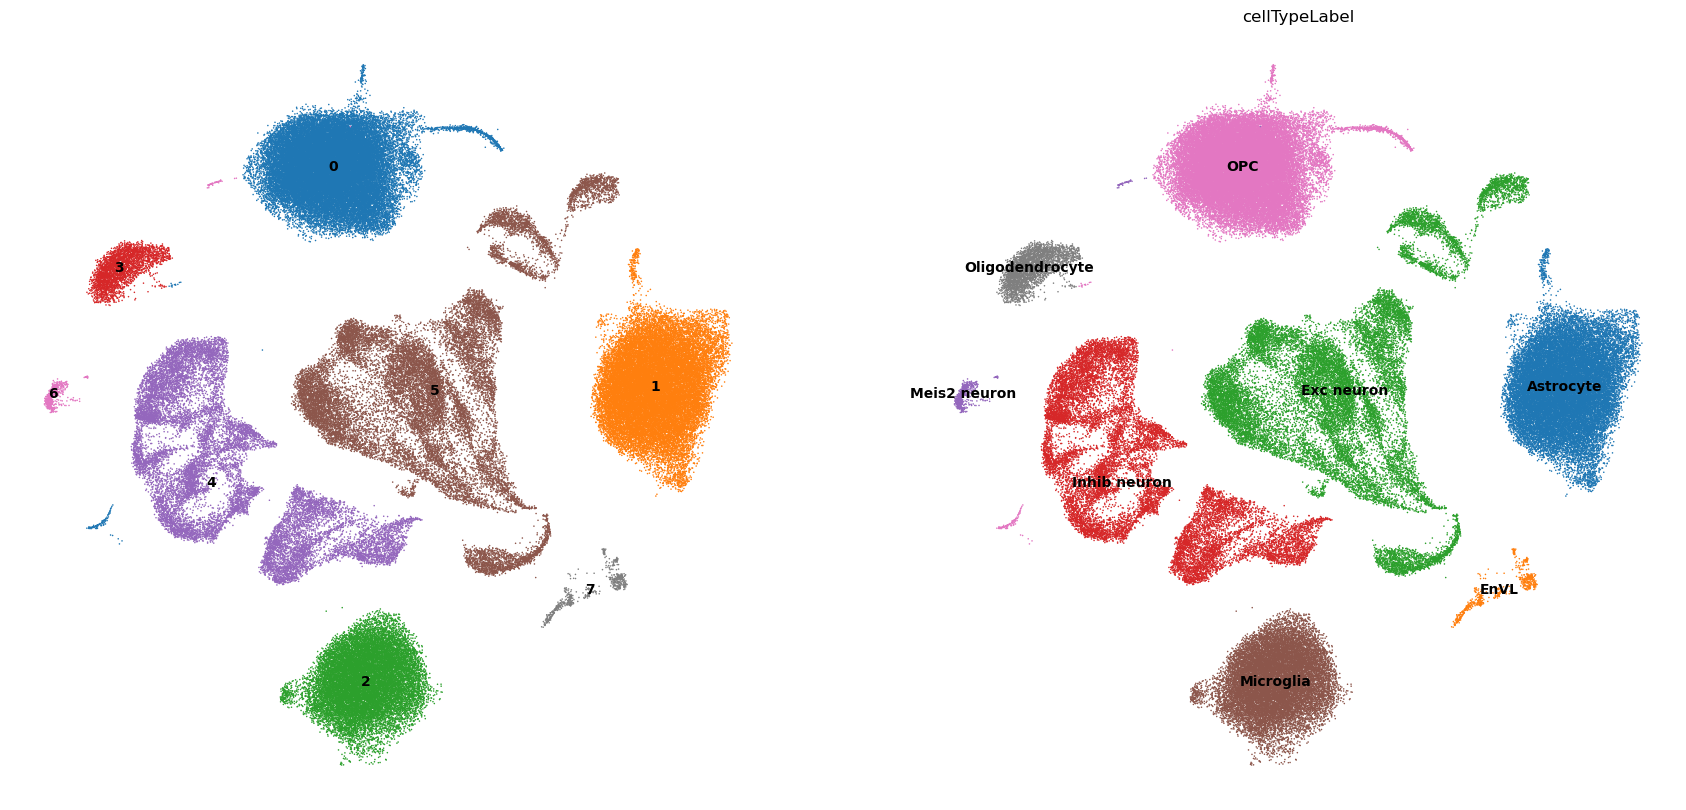

In [6]:
figsize(10,10)
sc.pl.umap(adata, color=['cellTypeID','cellTypeLabel'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5)
# sc.pl.umap(adata, color=['cluster_modified','sorted_ident'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5,save='allCells_umap.pdf')

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


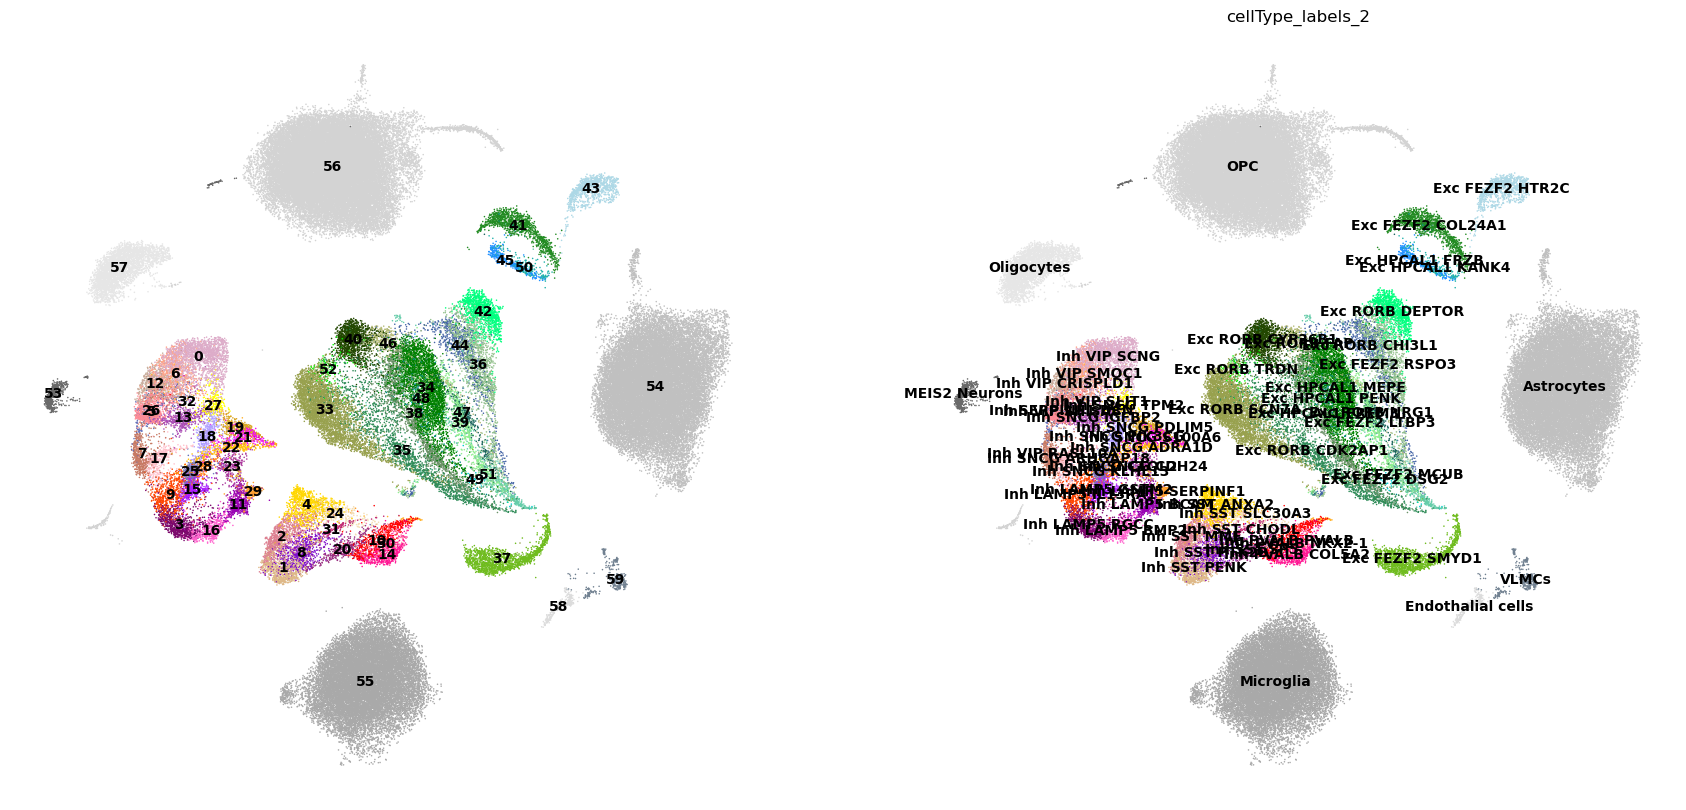

In [7]:
figsize(10,10)
sc.pl.umap(adata, color=['cellTypeID_2','cellType_labels_2'], legend_loc='on data', title='', frameon=False,use_raw=True,size=5)

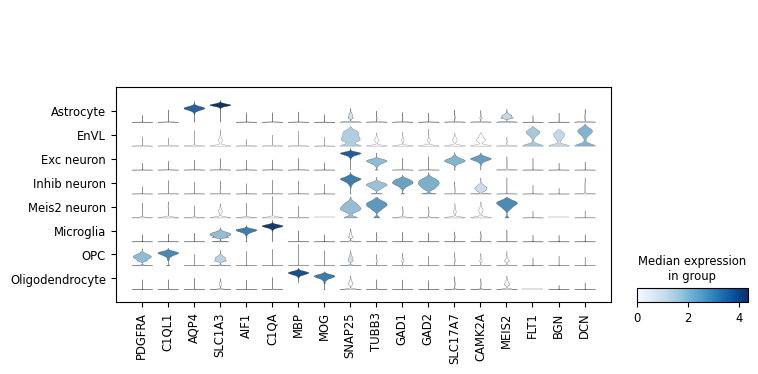

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


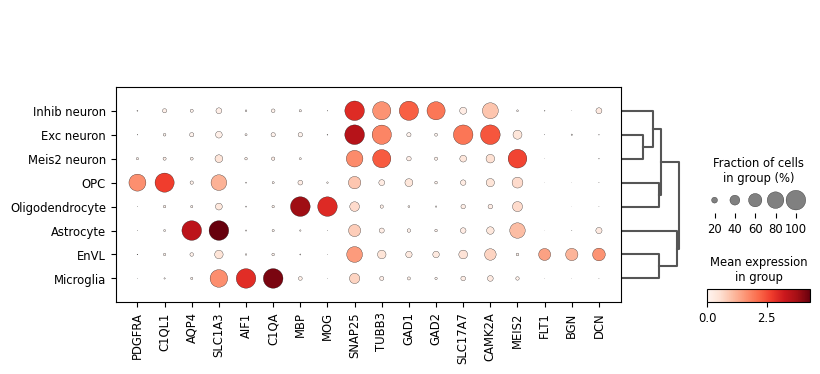

In [8]:
marker_genes = ['PDGFRA', 'C1QL1',              # markers for OPC
                'AQP4', 'SLC1A3',               # Astro
                'AIF1', 'C1QA',                 # Micro
                'MBP', 'MOG',                   # Oligo
                'SNAP25',              # Neuron
                'TUBB3', # 'RGS4',       # Neuron
                'GAD1', 'GAD2',                 # Inhibitory Neurons
                'SLC17A7', 'CAMK2A',            # Ext Neurons
                'MEIS2',                        # Meis2 Neurons (maybe Ext)
                'FLT1',                         # Endothalial cells
                'BGN', 'DCN' ]                  # Vascular leptomeningeal cells (VLMCs)

figsize(10,10)
sc.pl.stacked_violin(adata, groupby='cellTypeLabel', var_names=marker_genes,use_raw = True,  swap_axes = False) #,save='stacked_vio_allCells.pdf')
sc.pl.dotplot(adata, marker_genes, groupby='cellTypeLabel', dendrogram=True)

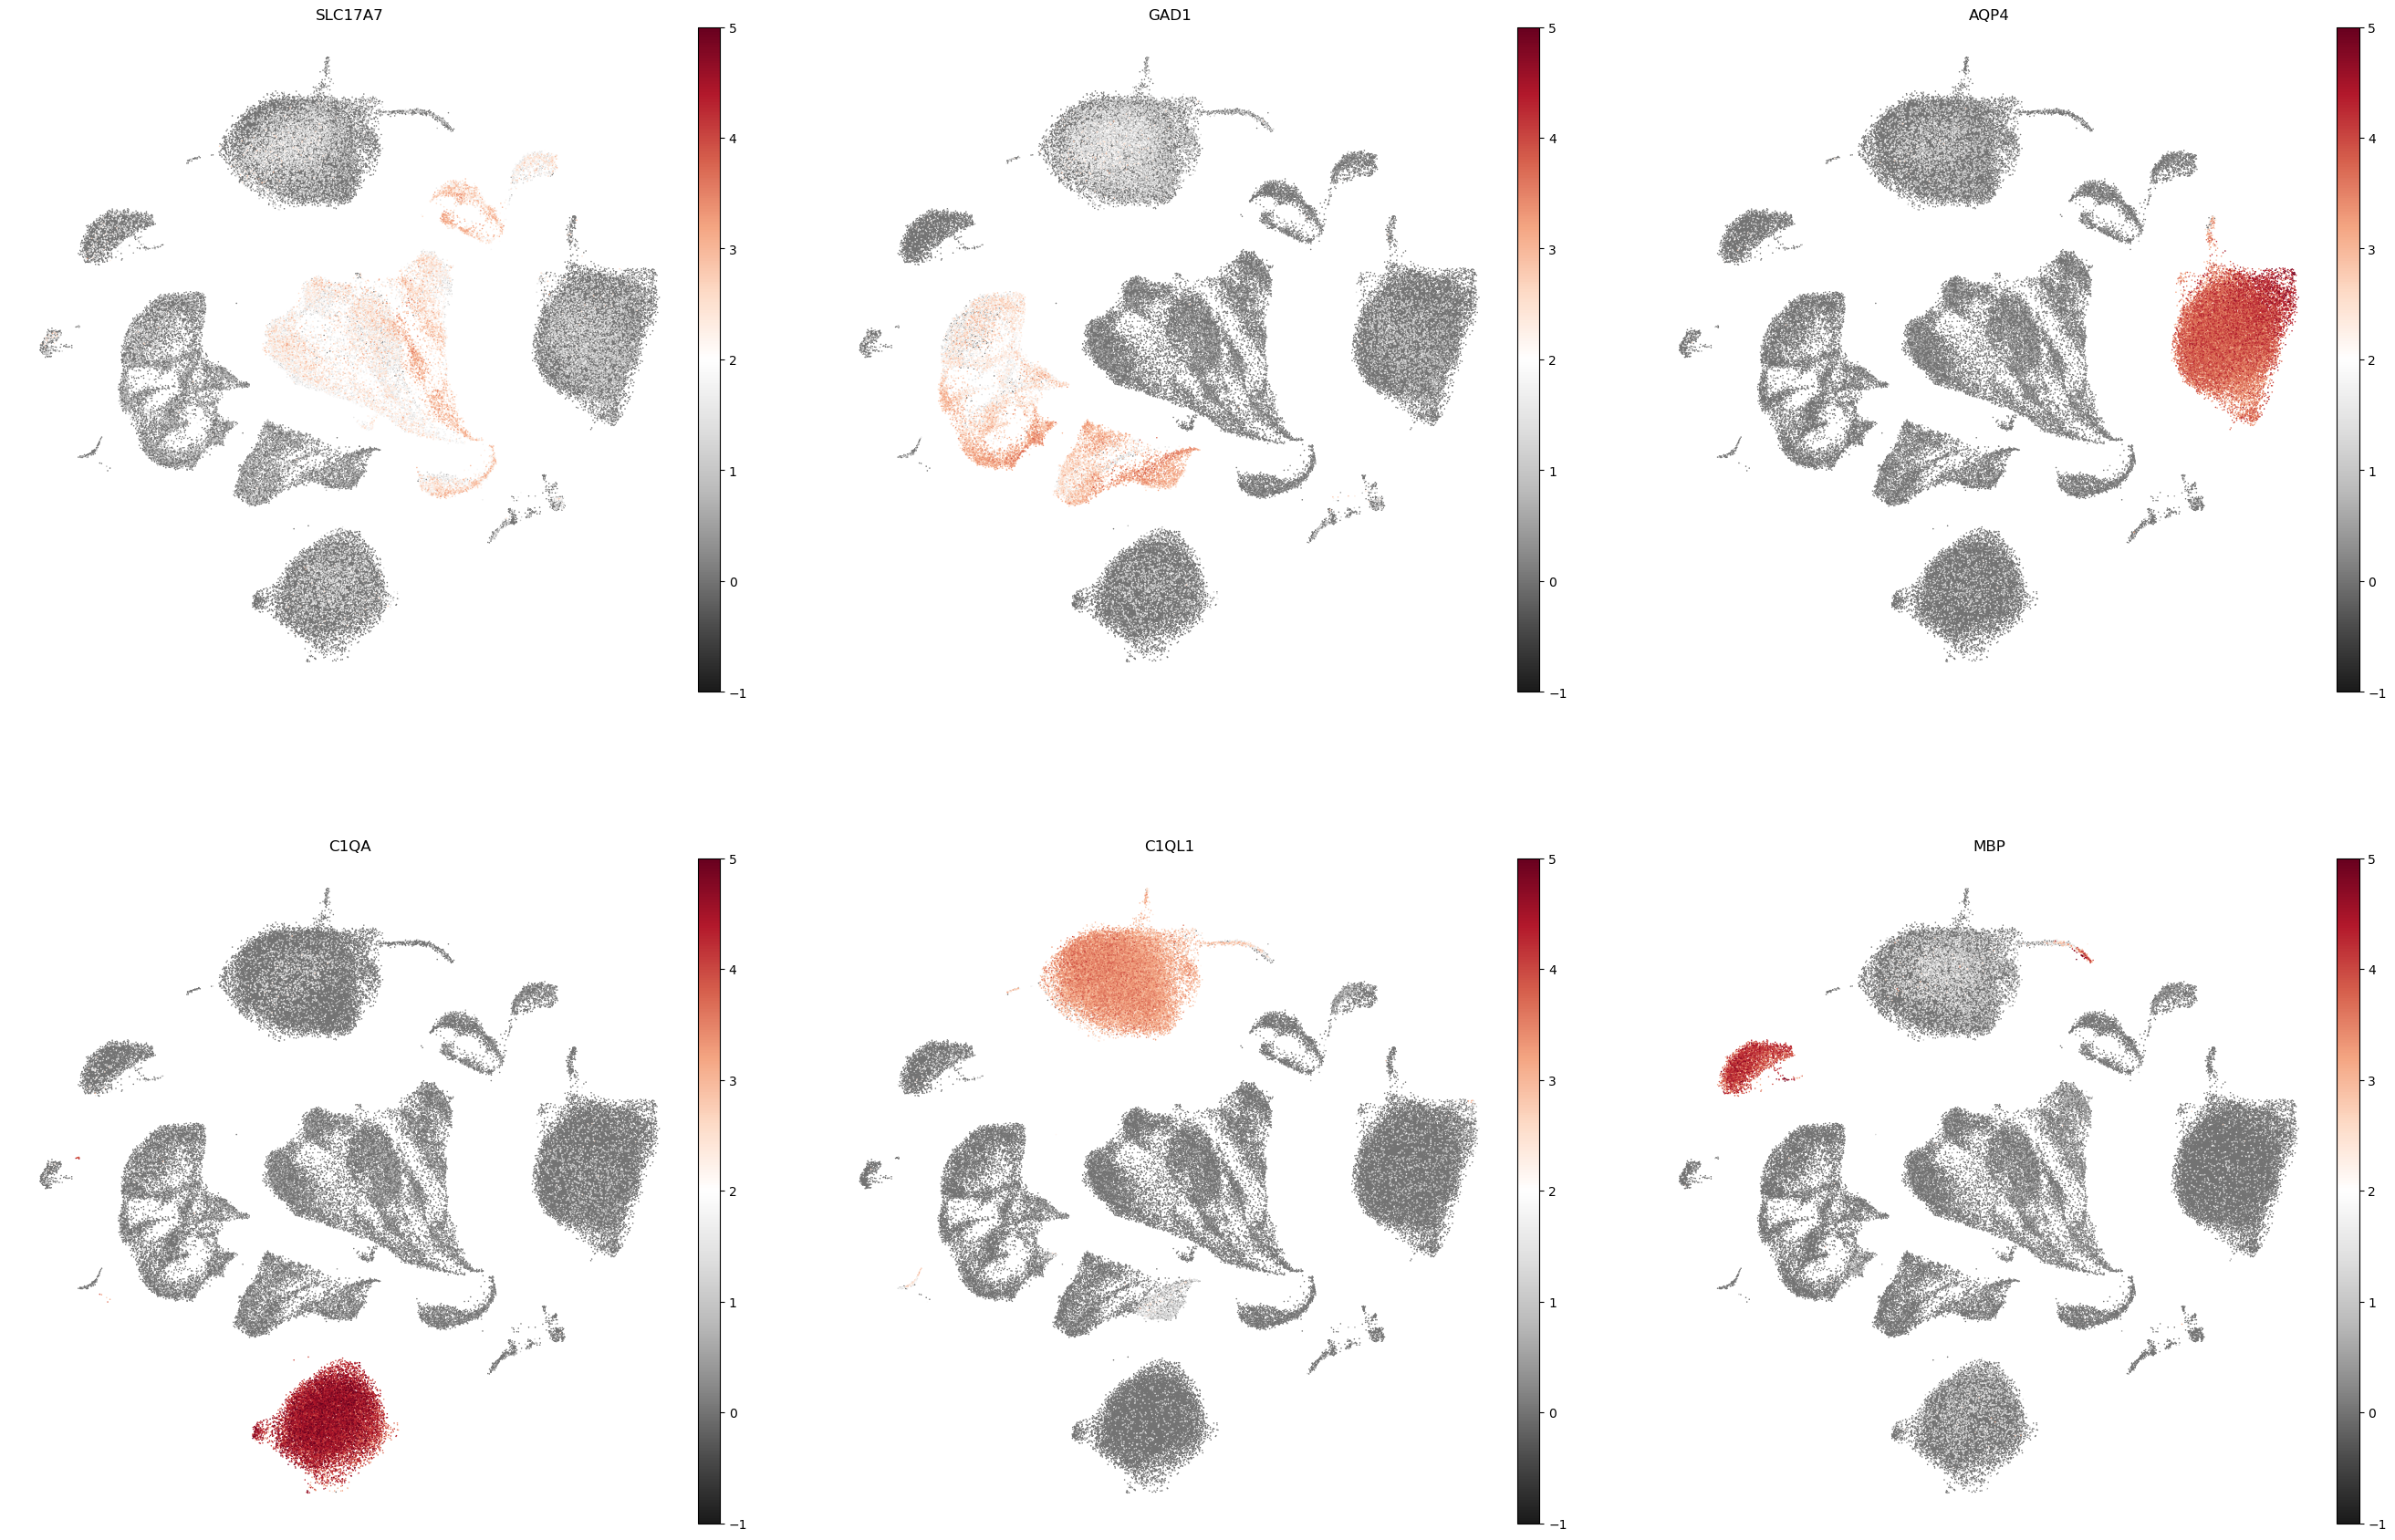

In [9]:
figsize(10,10)
sc.pl.umap(adata, color=['SLC17A7','GAD1','AQP4','C1QA','C1QL1','MBP'], legend_loc='on data', cmap = 'RdGy_r',vmax = 5,vmin = -1,  frameon=False,use_raw=True,size=5,ncols=3, save='cellMarkerExpress_umap.pdf')

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


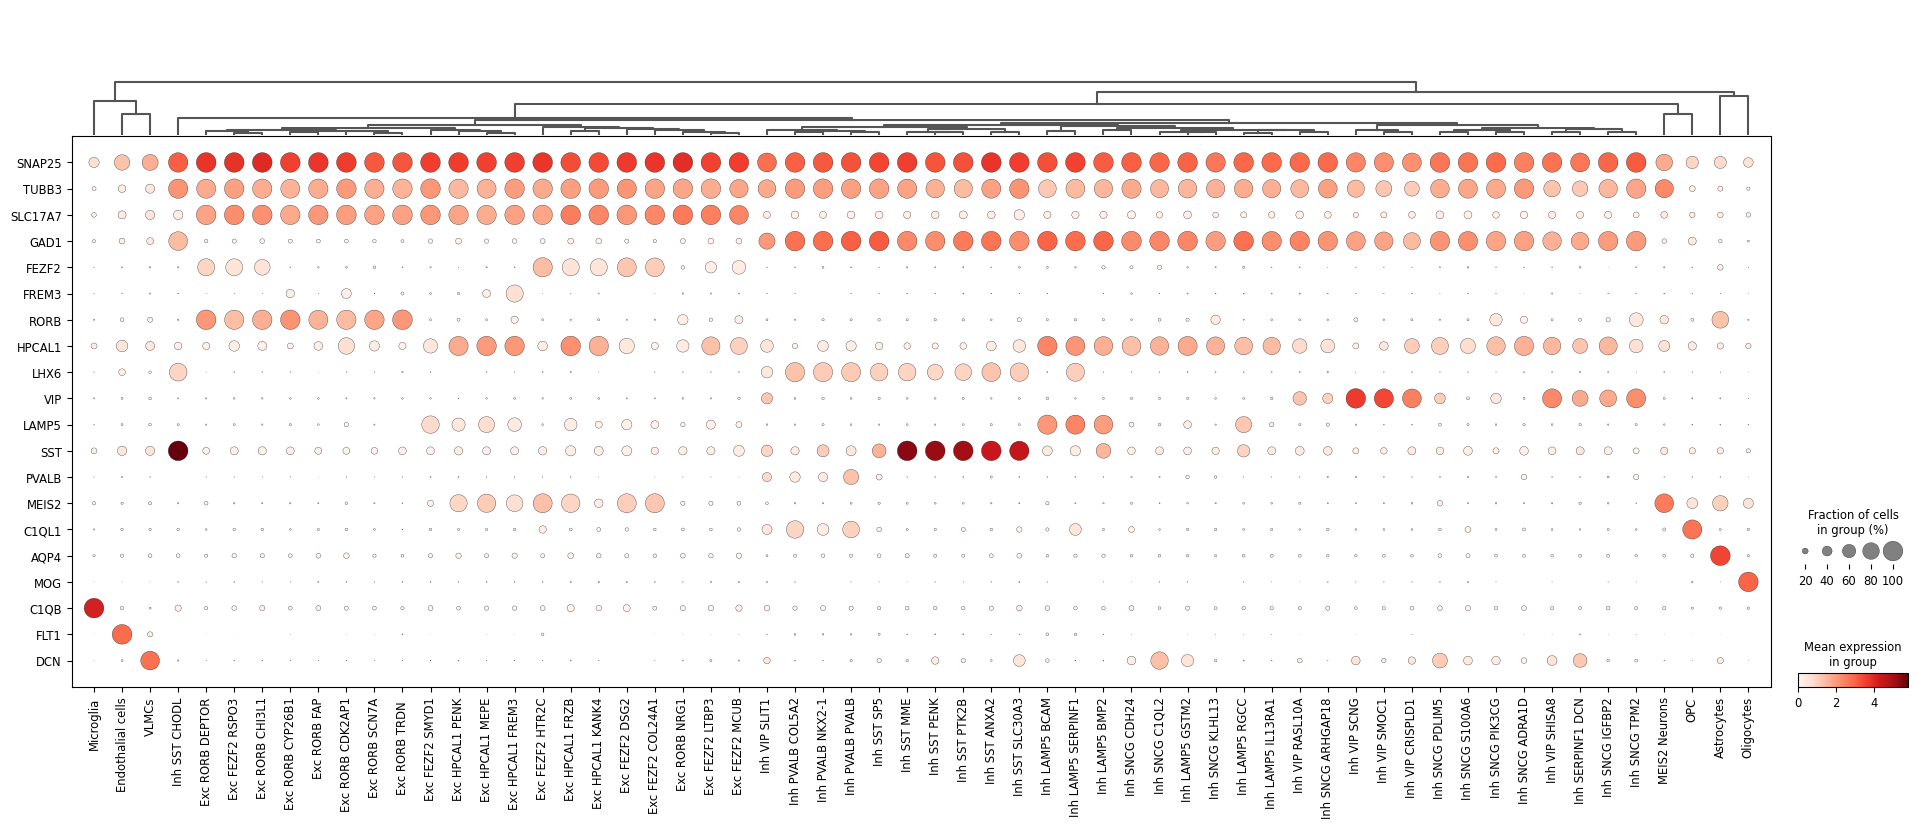

In [10]:
plot_genes = ['SNAP25','TUBB3','SLC17A7','GAD1','FEZF2','FREM3','RORB','HPCAL1','LHX6','VIP','LAMP5','SST','PVALB','MEIS2','C1QL1','AQP4', 'MOG','C1QB','FLT1','DCN']
sc.pl.dotplot(adata, var_names = plot_genes, groupby = 'cellType_labels_2', swap_axes = True, edgecolor='k', dendrogram = True)#, save = '/Fig_all_dot_NN.pdf')

In [11]:
adata

AnnData object with n_obs × n_vars = 122663 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sex', 'Sample', 'cellTypeID', 'cellTypeLabel', 'cell_subtypeID', 'cell_subtypeLabels', 'cellTypeID_2', 'cellType_labels_2', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Sex_colors', 'batch_colors', 'cellTypeID_2_colors', 'cellTypeID_colors', 'cellTypeLabel_colors', 'cellType_labels_2_colors', 'cell_subtypeID_colors', 'cell_subtypeLabels_colors', 'dendrogram_cellTypeLabel', 'dendrogram_cellType_labels_2', 'dendrogram_cell_subtypeLabels', 'hvg', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', '

# Plot cell counts bar

In [12]:
cell_label_reorder = adata.uns['dendrogram_cellType_labels_2']['categories_ordered']#list(adata.obs['cellType_labels_2'].cat.categories)
cell_label_reorder
cell_counts = pd.DataFrame(adata.obs['cellType_labels_2'].value_counts())
cell_counts = cell_counts.reindex(cell_label_reorder)

cell_label = adata.obs['cellType_labels_2'].cat.categories
cell_color = list(adata.uns['cellType_labels_2_colors'])

In [13]:
cell_cat = cell_label_reorder 
cell_counts = pd.DataFrame(adata.obs['cellType_labels_2'].value_counts())
cell_counts = cell_counts.reindex(cell_cat)

# width of the bars
barWidth = 1
cell_type_all = list(cell_counts.index)    # becase the sequence distinction between adata.obs['cellTypeID_2'].cat.categories and adata.obs['cellType_labels_2'].cat.categories. we have to reorder the cellTpe labels in cell_type_all same as that in cellTypeID_2.
heatmap_color = dict(zip(cell_label,cell_color))
heatmap_color_wk= pd.DataFrame.from_dict(heatmap_color, orient = 'index', columns = ['color'])

bar_color = dict(zip(cell_label,cell_color))
bar_color= pd.DataFrame.from_dict(heatmap_color, orient = 'index', columns = ['color'])
bar_color = heatmap_color_wk.reindex(cell_label_reorder)

bars_original = np.array(cell_counts['cellType_labels_2'])
bars = np.log10(bars_original)

# The x position of bars
xx = np.arange(len(bars))

/tmp/ipykernel_803/1652574149.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_type_all,rotation=90,size=8)


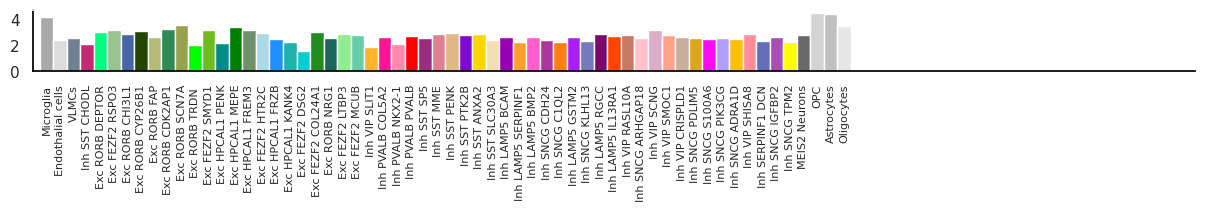

In [14]:
fig = plt.figure(figsize = (15,0.8))
plt.rcParams['font.size'] = '2'
gs = GridSpec(1, 1, figure=fig)
sns.set(font_scale=1)

ax = fig.add_subplot(gs[0, 0])
# Plot bars
ax.bar(xx, bars, width = barWidth, color = bar_color['color'])
ax.set_yticks([0,2,4]) 
ax.set_xticklabels(cell_type_all,rotation=90,size=8)
ax.set_xticks(np.arange(len(cell_type_all)))
ax.set_xlim([-1,85])
ax.set_facecolor('white')
ax.spines['bottom'].set_color('#000000')
ax.spines['left'].set_color('#000000') 

plt.savefig("figures/Fig1_cell_counts.pdf", dpi = 600)

# Proportion of cell types present in individual sample.

In [15]:
adata

AnnData object with n_obs × n_vars = 122663 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sex', 'Sample', 'cellTypeID', 'cellTypeLabel', 'cell_subtypeID', 'cell_subtypeLabels', 'cellTypeID_2', 'cellType_labels_2', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Sex_colors', 'batch_colors', 'cellTypeID_2_colors', 'cellTypeID_colors', 'cellTypeLabel_colors', 'cellType_labels_2_colors', 'cell_subtypeID_colors', 'cell_subtypeLabels_colors', 'dendrogram_cellTypeLabel', 'dendrogram_cellType_labels_2', 'dendrogram_cell_subtypeLabels', 'hvg', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', '

In [16]:
subCellTypeIDs = np.sort(adata.obs['cellTypeID_2'].cat.codes.unique())
subCellTypeIDs
nSample = len(np.sort(adata.obs['Sample'].cat.codes.unique()))
nSample

22

In [17]:
n_cells = np.zeros([nSample,len(subCellTypeIDs)])
for sample in range(nSample):
    sampleData = adata[adata.obs['Sample']=='batch-'+str(sample+1)]
    for subCellTypeID in subCellTypeIDs:
        n_cells[sample,subCellTypeID] = np.sum(sampleData.obs['cellTypeID_2']==subCellTypeID)
 
    # n_cells[sample] = n_cells[sample]/np.sum(n_cells[sample,:])
nCell_percent = np.zeros([nSample,len(subCellTypeIDs)])
for sample in range(nSample):
    nCell_percent[sample] = n_cells[sample]/np.sum(n_cells[sample,:])
    

In [18]:
subCellTypeIDs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


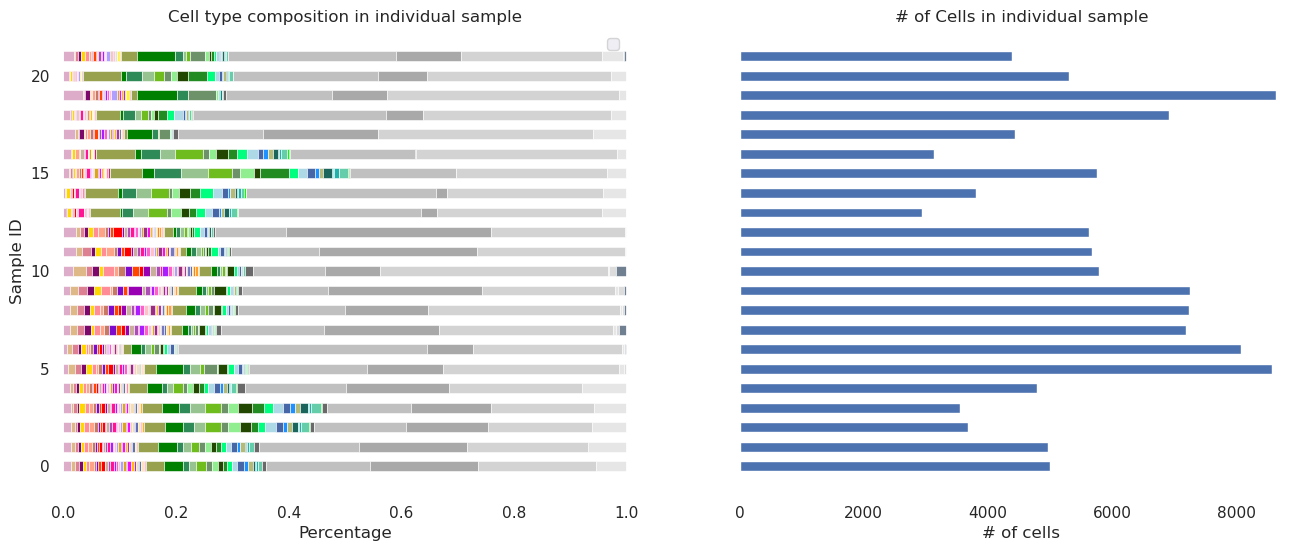

In [19]:
fig, axs = plt.subplots(1,2, figsize=(16,6), sharey=True)
width = 0.5
for i in range(len(subCellTypeIDs)):
    axs[0].barh(range(22), nCell_percent[:,i], width, left = np.sum(nCell_percent[:,:i],axis=1), color=bar_color['color'][ adata.obs['cellType_labels_2'].cat.categories[i]  ],linewidth=0.4)

axs[0].set_title("Cell type composition in individual sample")
axs[0].spines['right'].set_visible(True)
axs[0].spines['top'].set_visible(True)
axs[0].set_facecolor('white')
axs[0].legend(loc="best")
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Sample ID')

# plot the number of cells in each sample
n_cells_sample = np.sum(n_cells,axis=1)
axs[1].barh(range(22),n_cells_sample, width, left=0)
axs[1].set_facecolor('white')
axs[1].set_title("# of Cells in individual sample")
axs[1].spines['right'].set_visible(True)
axs[1].spines['top'].set_visible(True)
axs[1].set_xlabel('# of cells')

plt.savefig("figures/suppl_NrCellsStat.pdf", dpi = 600)

In [20]:
# Prepare the number of cells in each cell type.
n_cellTypesAllSample = np.sum(n_cells,axis=0)
n_cellTypes = np.zeros(9)
n_cellTypes[0] = np.sum(n_cellTypesAllSample[0:32])
n_cellTypes[1] = np.sum(n_cellTypesAllSample[33:53])
n_cellTypes[2] = np.sum(n_cellTypesAllSample[53])
n_cellTypes[3] = np.sum(n_cellTypesAllSample[54])
n_cellTypes[4] = np.sum(n_cellTypesAllSample[55])   #  np.sum(n_cellTypesAllSample[54:63])
n_cellTypes[5] = np.sum(n_cellTypesAllSample[56])   #  np.sum(n_cellTypesAllSample[63:68])
n_cellTypes[6] = np.sum(n_cellTypesAllSample[57])   #  np.sum(n_cellTypesAllSample[68:75])
n_cellTypes[7] = np.sum(n_cellTypesAllSample[58])   #  np.sum(n_cellTypesAllSample[75:80])
n_cellTypes[8] = np.sum(n_cellTypesAllSample[59])   #  np.sum(n_cellTypesAllSample[80:87])

n_cellTypes

array([16281., 21733.,   643., 26608., 17661., 35913.,  3101.,   270.,
         370.])

In [21]:
# number of MEIS2 cells.
np.sum(n_cellTypesAllSample[53])

643.0

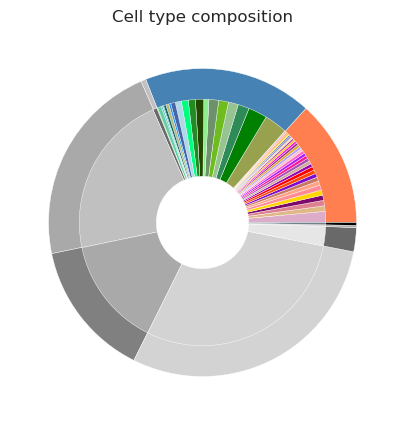

In [22]:
# reorder the colors
clusterOrder = adata.obs['cellType_labels_2'].cat.categories
bar_color = bar_color.reindex(clusterOrder)

# Pie plot of the cell type composition.
size = 0.2
lineW = 0.3
cmap = plt.colormaps["tab20c"]
outer_colors = ['coral','steelblue','#C0C0C0', 'darkgray','grey', '#D3D3D3', 'dimgray', 'darkgray','black',]
inner_colors = cmap(range(87))

figsize(5,5)
fig, ax = plt.subplots()
ax.pie(n_cellTypes, radius=1, colors=outer_colors,
       wedgeprops=dict(width=0.5, edgecolor='w',linewidth=lineW))
ax.pie(n_cellTypesAllSample, radius=1-size, colors=bar_color['color'], 
       wedgeprops=dict(width=0.5, edgecolor='w',linewidth=lineW))
ax.set(aspect="equal", title='Cell type composition')

fig.savefig("figures/suppl_subclustersCountsPie.pdf", dpi = 600)

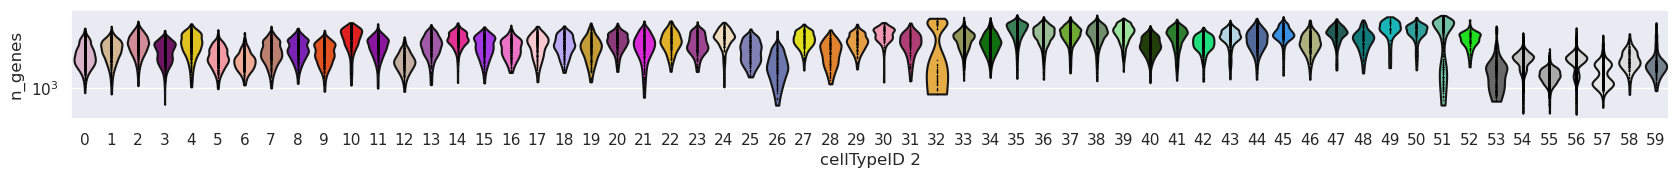

In [23]:
# plot the detected genes in each cell cluster.
figsize(16,1.5)
sc.pl.violin(adata,'n_genes',groupby='cellTypeID_2',log=True, jitter=False,color=bar_color['color'],save='suppl_detectedGenes_eachClass.pdf')


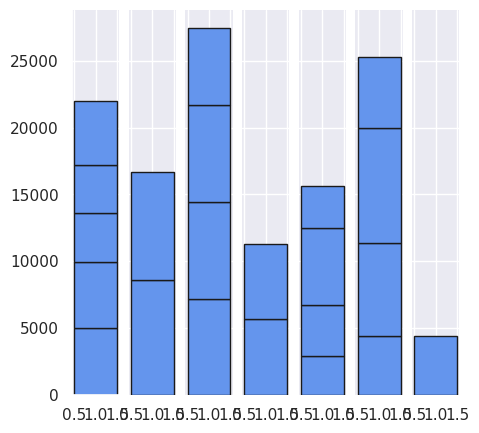

In [24]:
# Sample size in animals
n_cells_sample

animal1 = n_cells_sample[0:5]
animal2 = n_cells_sample[5:7]
animal3 = n_cells_sample[7:11]
animal4 = n_cells_sample[11:13]
animal5 = n_cells_sample[13:17]
animal6 = n_cells_sample[17:21]
animal7 = n_cells_sample[21:22]
n_sample = np.array([len(animal1), len(animal2), len(animal3), len(animal4), len(animal5), len(animal6), len(animal7)])

fig, ax = plt.subplots(1,7,figsize=(5,5), sharey=True)
barWidth = 1.0
for j in range(5):
    ax[0].bar(1,animal1[j],barWidth,bottom=np.sum(animal1[:j]),color='cornflowerblue',edgecolor='k' )
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
for j in range(2):
    ax[1].bar(1,animal2[j],barWidth,bottom=np.sum(animal2[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
for j in range(4):
    ax[2].bar(1,animal3[j],barWidth,bottom=np.sum(animal3[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)
for j in range(2):
    ax[3].bar(1,animal4[j],barWidth,bottom=np.sum(animal4[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[3].spines['right'].set_visible(False)
    ax[3].spines['top'].set_visible(False)
    ax[3].spines['left'].set_visible(False)
    ax[3].spines['bottom'].set_visible(False)
for j in range(4):
    ax[4].bar(1,animal5[j],barWidth,bottom=np.sum(animal5[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[4].spines['right'].set_visible(False)
    ax[4].spines['top'].set_visible(False)
    ax[4].spines['left'].set_visible(False)
    ax[4].spines['bottom'].set_visible(False)
for j in range(4):
    ax[5].bar(1,animal6[j],barWidth,bottom=np.sum(animal6[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[5].spines['right'].set_visible(False)
    ax[5].spines['top'].set_visible(False)
    ax[5].spines['left'].set_visible(False)
    ax[5].spines['bottom'].set_visible(False)
for j in range(1):
    ax[6].bar(1,animal7[j],barWidth,bottom=np.sum(animal7[:j]),color='cornflowerblue',edgecolor='k'  )
    ax[6].spines['right'].set_visible(False)
    ax[6].spines['top'].set_visible(False)
    ax[6].spines['left'].set_visible(False)
    ax[6].spines['bottom'].set_visible(False)
    
plt.savefig("figures/suppl_samplesFromEachAnimal.pdf", dpi = 600)

In [25]:
adata.obs['cellType_labels_2']

AAACCTGAGAATTGTG-1-batch-1          Astrocytes
AAACCTGAGGGTATCG-1-batch-1                 OPC
AAACCTGGTAGCTGCC-1-batch-1      Exc FEZF2 MCUB
AAACCTGGTCAGAGGT-1-batch-1     Exc HPCAL1 MEPE
AAACCTGGTGGCGAAT-1-batch-1      Inh LAMP5 BMP2
                                    ...       
TTTGTTGAGATTGGGC-1-batch-22                OPC
TTTGTTGAGCATGTTC-1-batch-22         Astrocytes
TTTGTTGAGCGACCCT-1-batch-22                OPC
TTTGTTGAGGATGCGT-1-batch-22                OPC
TTTGTTGGTAGACGGT-1-batch-22    Inh LAMP5 GSTM2
Name: cellType_labels_2, Length: 122663, dtype: category
Categories (60, object): ['Inh VIP SCNG', 'Inh SST PENK', 'Inh SST MME', 'Inh LAMP5 RGCC', ..., 'OPC', 'Oligocytes', 'Endothalial cells', 'VLMCs']

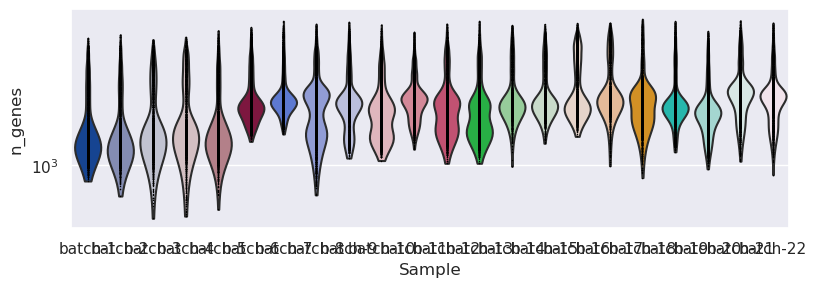

In [26]:
# plot the detected genes in each sample
figsize(8,3)
sc.pl.violin(adata,'n_genes',groupby='Sample',log=True, jitter=False,color='g',save='suppl_detectedGenes_eachSample.pdf')

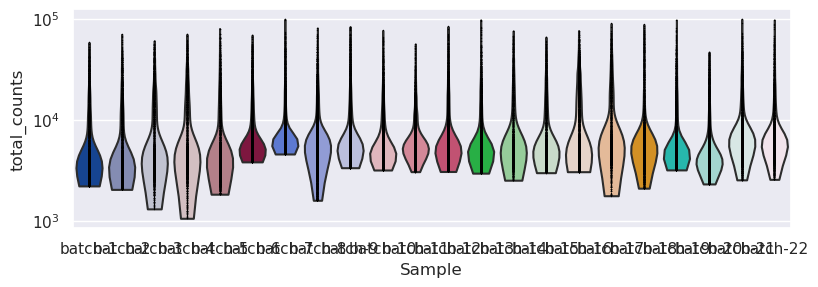

In [27]:
# plot the total counts in each sample
figsize(8,3)
ax = sc.pl.violin(adata,'total_counts',groupby='Sample',log=True, jitter=False,color='g',save='suppl_totalCounts_eachSample.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


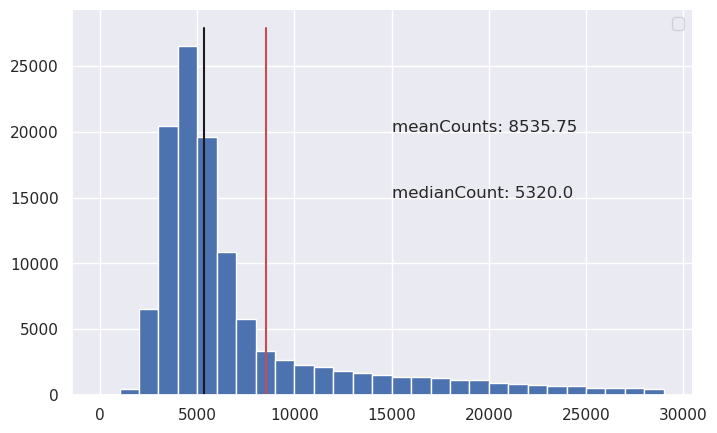

In [28]:
# of cells relative to the UMI counts
figsize(8,5)
nCells_hist = hist(adata.obs['total_counts'],bins=range(0,30000,1000))
meanCounts = np.mean(adata.obs['total_counts'])
medianCount = np.median(adata.obs['total_counts'])
# add figure properties.
ax = plt.gca()
ylim= ax.get_ylim()
ax.plot([meanCounts,meanCounts],ylim,c='r')
ax.plot([medianCount,medianCount],ylim,c='k')
ax.text(15000,20000,'meanCounts: '+str(meanCounts))
ax.text(15000,15000,'medianCount: '+str(medianCount))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right')

plt.savefig("figures/suppl_UMIcountsDistribution.pdf", dpi = 600)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


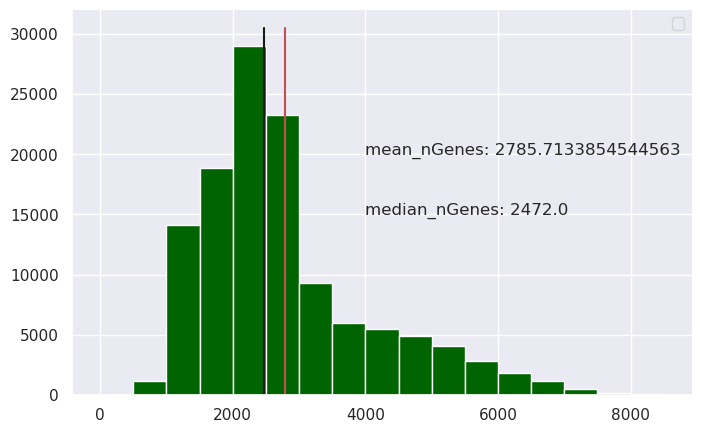

In [29]:
# of cells relative to the detected genes
figsize(8,5)
nCells_hist = hist(adata.obs['n_genes'],bins=range(0,9000,500),color = 'darkgreen')
mean_nGenes = np.mean(adata.obs['n_genes'])
median_nGenes = np.median(adata.obs['n_genes'])
# add figure properties.
ax = plt.gca()
ylim= ax.get_ylim()
ax.plot([mean_nGenes,mean_nGenes],ylim,c='r')
ax.plot([median_nGenes,median_nGenes],ylim,c='k')
ax.text(4000,20000,'mean_nGenes: '+str(mean_nGenes))
ax.text(4000,15000,'median_nGenes: '+str(median_nGenes))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right')

plt.savefig("figures/suppl_detectedGenesDistribution.pdf", dpi = 600)

/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/liu/anaconda3/envs/bioSoft/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


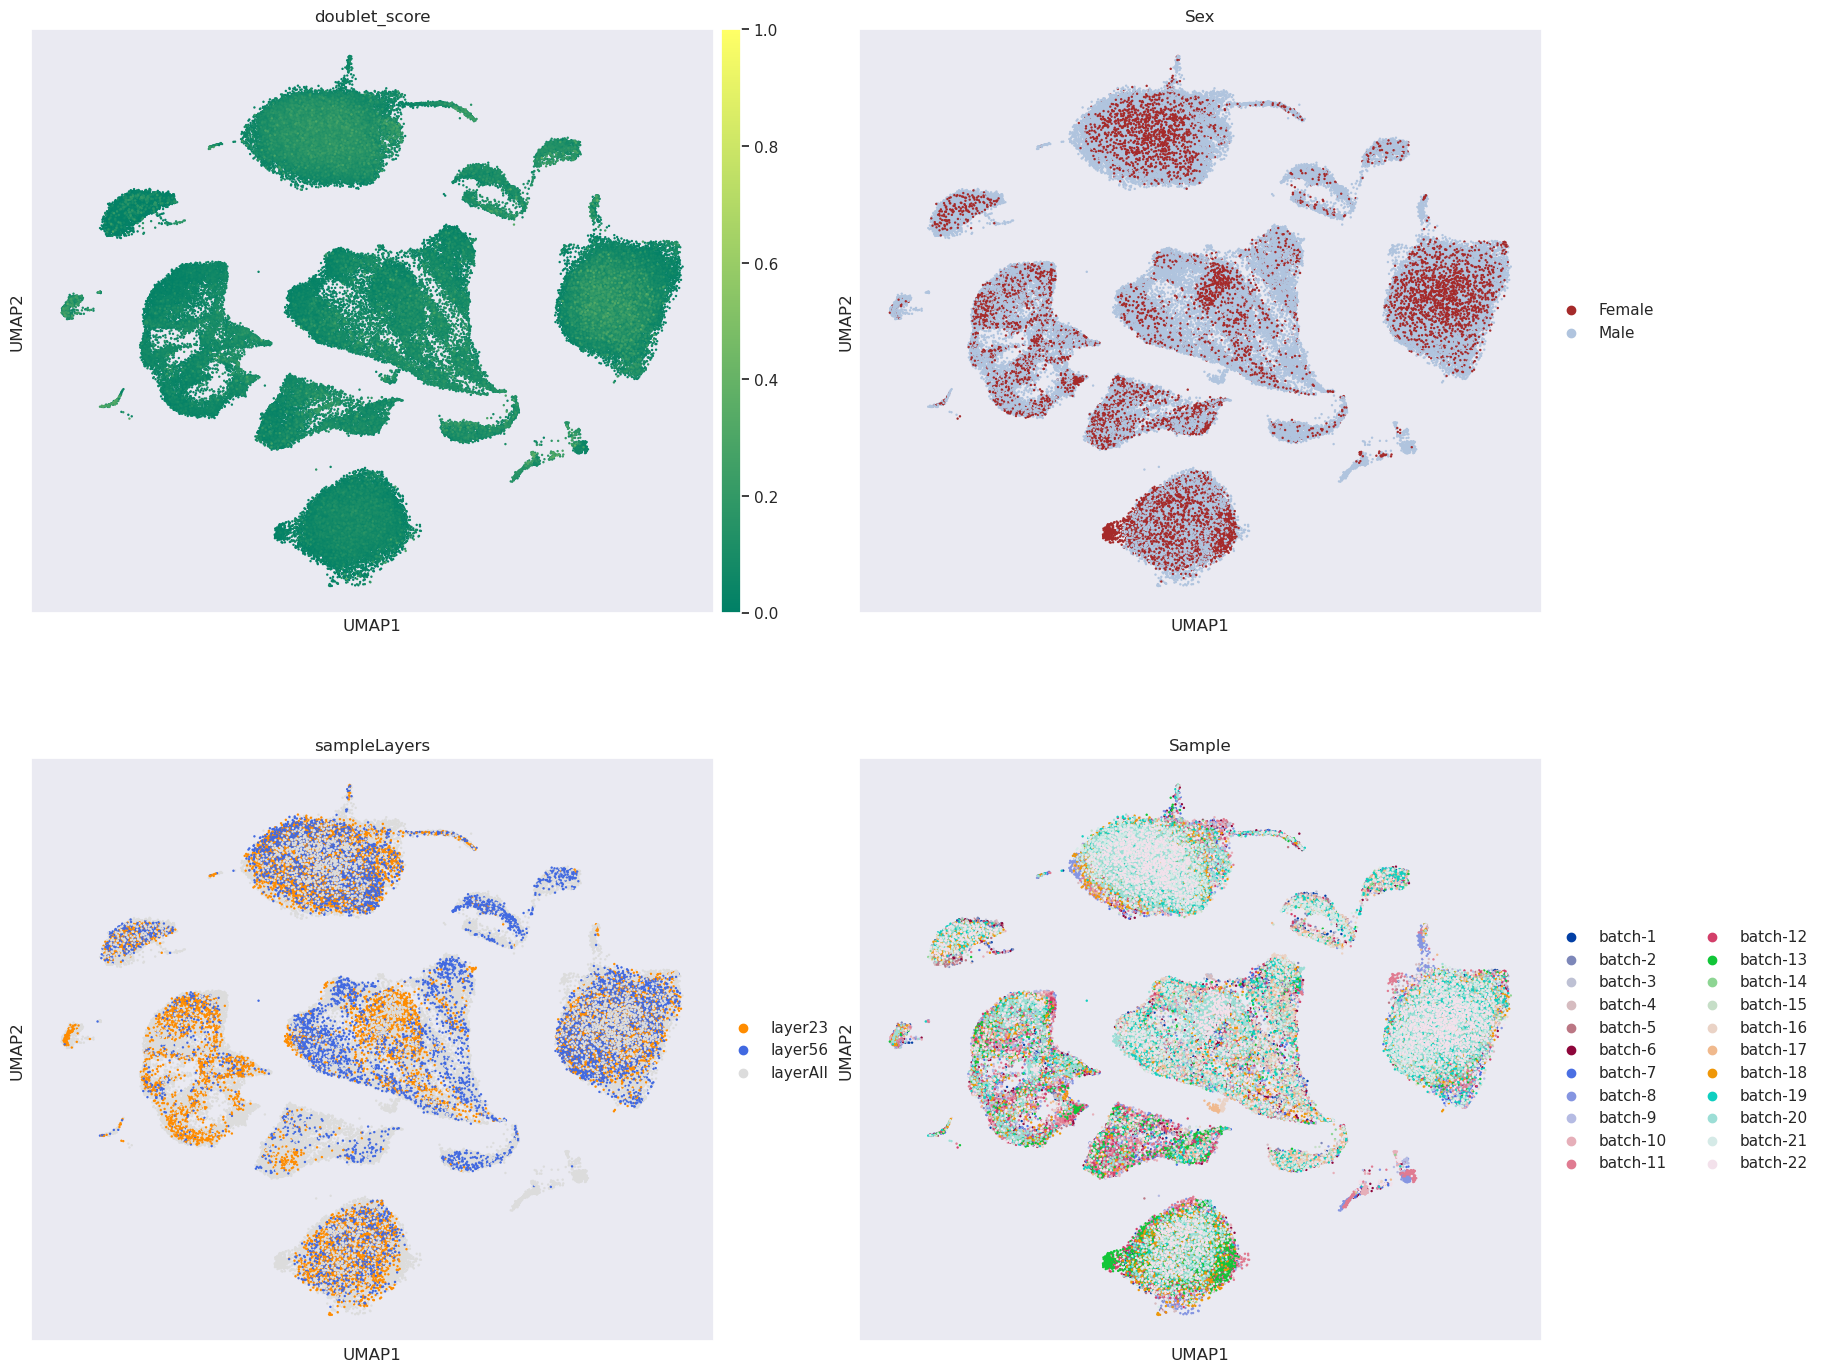

In [30]:
figsize(9,8)
sc.pl.umap(adata,color=['doublet_score','Sex','sampleLayers','Sample'],vmin=0,vmax=1.0, size=12, cmap = 'summer',ncols=2,save='suppl_umaps.pdf')# 'RdGy_r',)